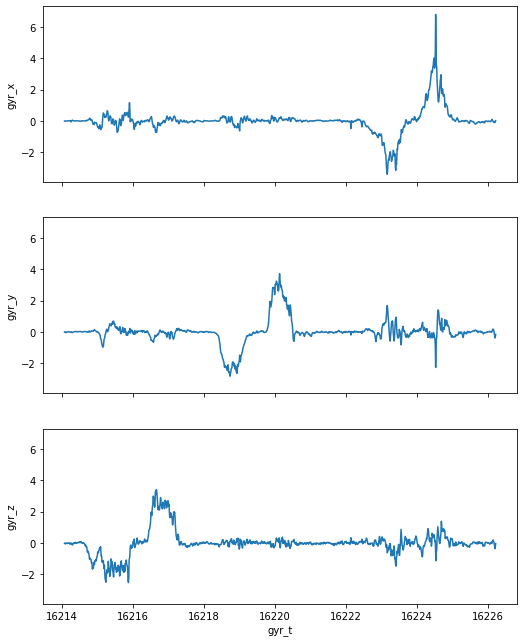

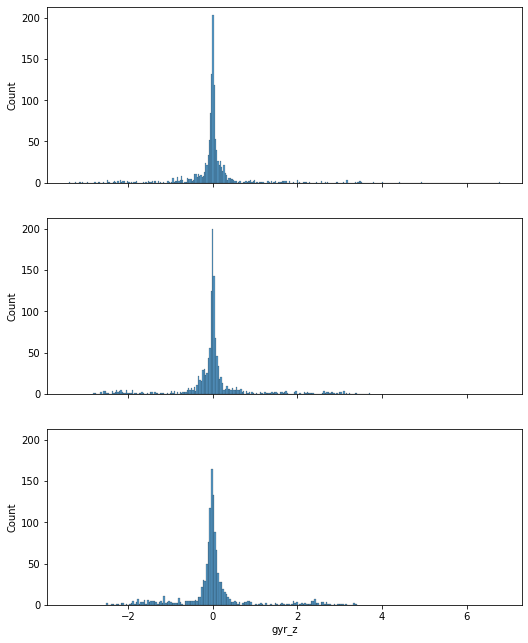

In [22]:
#!/usr/bin/env python3
# 3D animation using rotation matrix
# import sys
# sys.path.append("../utils")
from utils.utils import preprocess_watch_data
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from math import sin,cos
from numpy import random
from utils.utils import get_2d_cartesian_axes
import seaborn as sns

df = preprocess_watch_data("data/2021-12-13_16_14_12_Andrew’s Apple Watch.csv",plot=True)
omega = np.array(df[['gyr_x','gyr_y','gyr_z']])
time = df['gyr_t']
thetas = [np.zeros(3)]
Rs = [np.eye(3,3)]
bases = [np.eye(3,3)]
def get_rotation_matrix_from_yaw_pitch_roll(roll,pitch,yaw):
    ## according to right hand rule,
    # yaw = z rotation
    # pitch = y rotation
    # roll = x rotation
    R_x = np.array([[1,0,0],[0,cos(roll),-sin(roll)],[0,sin(roll),cos(roll)]])
    R_y = np.array([[cos(pitch),0,sin(pitch)],[0,1,0],[-sin(pitch),0,cos(pitch)]])
    R_z = np.array([[cos(yaw),-sin(yaw),0],[sin(yaw),cos(yaw),0],[0,0,1]])
    R = R_z @ R_y @ R_x
    return R
def get_yaw_pitch_roll(n):
    return omega[n]*(time[n]-time[n-1])+thetas[n-1]
def get_rotated_basis(basis,R):
    return R @ basis

In [23]:
omega[0]

array([-0.00972807,  0.00536306, -0.02120373])

In [24]:
for i,_ in enumerate(time):
    if (i==0):
        # don't have delta t, next
        continue
    theta = get_yaw_pitch_roll(i)
    thetas.append(theta)
    R = get_rotation_matrix_from_yaw_pitch_roll(*theta)
    
    Rs.append(R)
    bases.append(get_rotated_basis(bases[0],R))


In [21]:
np.save('rpy.npy',np.array(thetas))

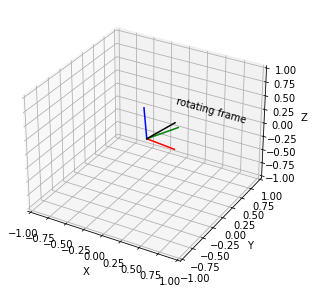

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
from pytransform3d.plot_utils import Frame
from pytransform3d import rotations as pr


def update_frame(step, n_frames, frame):
    R = bases[step]
    A2B = np.eye(4)
    A2B[:3, :3] = R
    frame.set_data(A2B)
    return frame


if __name__ == "__main__":
    n_frames = len(time)

    fig = plt.figure(figsize=(5, 5))

    ax = fig.add_subplot(111, projection="3d")
    ax.set_xlim((-1, 1))
    ax.set_ylim((-1, 1))
    ax.set_zlim((-1, 1))
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    frame = Frame(np.eye(4), label="rotating frame", s=0.5)
    frame.add_frame(ax)

    anim = animation.FuncAnimation(
        fig, update_frame, n_frames, fargs=(n_frames, frame), interval=50,
        blit=False)
    anim.save('basic_animation.mp4', fps=100, extra_args=['-vcodec', 'libx264'])

    plt.show()